In [1]:
# -------------------------------------------------------------------------------------
# Third party imports
# -------------------------------------------------------------------------------------
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import os, sys
import glob 

import astropy
from astropy.io import fits
from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from astropy import units as u
from astropy import constants as c
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import FK5, ICRS, GCRS, GeocentricMeanEcliptic, BarycentricMeanEcliptic, HeliocentricMeanEcliptic, GeocentricTrueEcliptic, BarycentricTrueEcliptic, HeliocentricTrueEcliptic, HeliocentricEclipticIAU76
from astropy.constants import R_sun, R_earth
from astropy.nddata import CCDData

from matplotlib.colors import LogNorm

from IPython.display import display, Markdown, clear_output

import inspect
import importlib
import warnings
warnings.filterwarnings('ignore')

# Plot setup
matplotlib.rc('font', size=22, family='normal', weight='bold')
plt.rcParams['figure.figsize'] = [10, 4]
np.printoptions(suppress=True)

In [2]:
# Local imports
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import imagehandler
importlib.reload(imagehandler)
import glob
filenames=sorted(glob.glob('/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::15][:20]
print(f"{len(filenames)} files")
print(' '.join(filenames))

20 files
/home/mikea/.shifty_data/tess/5/1/4/tess2018319225938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty_data/tess/5/1/4/tess2018320062938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty_data/tess/5/1/4/tess2018320135938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty_data/tess/5/1/4/tess2018320212938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty_data/tess/5/1/4/tess2018321045938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty_data/tess/5/1/4/tess2018321122938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty_data/tess/5/1/4/tess2018321195938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty_data/tess/5/1/4/tess2018322032938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty_data/tess/5/1/4/tess2018322105938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty_data/tess/5/1/4/tess2018322185938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty_data/tess/5/1/4/tess2018323022938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty_data/tess/5/1/4/tess2018323095938-s0005-1-4-0125-s_ffic.fits /home/mikea/.shifty

Combining images using median stacking.
Saving to file Tess_20images-mean_stack_median.fits
Done!
Combining images using mean stacking


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Saving to file Tess_20images-mean_stack_mean.fits
Done!


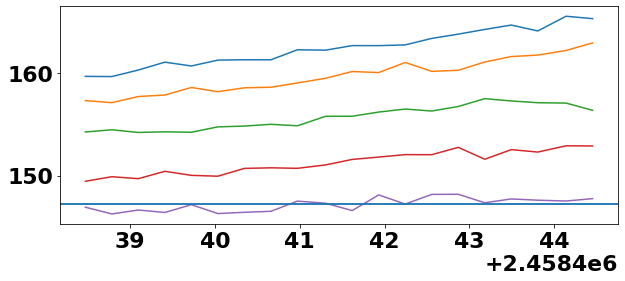

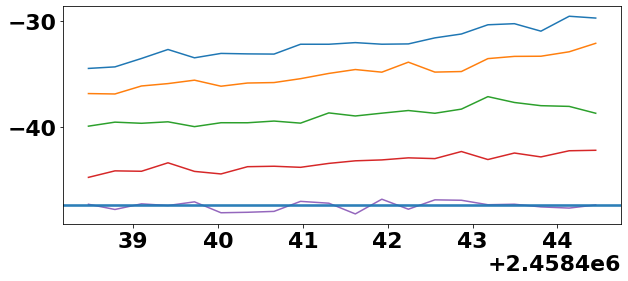

In [3]:
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
plt.figure()
plt.plot(times, [d[204,199] for d in D.image_data.data])
plt.plot(times, [d[406,368] for d in D.image_data.data])
plt.plot(times, [d[604,591] for d in D.image_data.data])
plt.plot(times, [d[803,796] for d in D.image_data.data])
plt.plot(times, [d[1019,1011] for d in D.image_data.data])
plt.axhline(np.mean([d[1019,1011] for d in D.image_data.data]))
plt.axhline(np.median([d[1019,1011] for d in D.image_data.data]))
for d in D.image_data.data:
    d -= np.mean(d)
plt.figure()
plt.plot(times, [d[204,199] for d in D.image_data.data])
plt.plot(times, [d[406,368] for d in D.image_data.data])
plt.plot(times, [d[604,591] for d in D.image_data.data])
plt.plot(times, [d[803,796] for d in D.image_data.data])
plt.plot(times, [d[1019,1011] for d in D.image_data.data])
plt.axhline(np.mean([d[1019,1011] for d in D.image_data.data]))
plt.axhline(np.median([d[1019,1011] for d in D.image_data.data]))
D.stack(shifted=False, median_combine=True)
D.save_stack(f'Tess_{len(times)}images-mean_stack_median.fits')
D.stack(shifted=False, median_combine=False)
D.save_stack(f'Tess_{len(times)}images-mean_stack_mean.fits')

<Figure size 720x288 with 0 Axes>

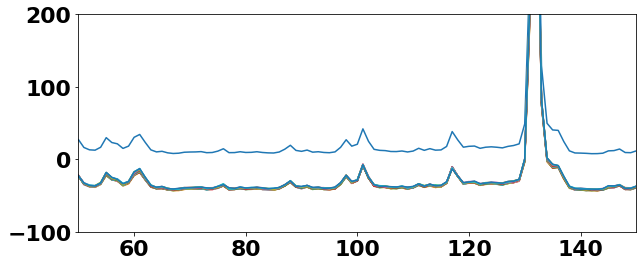

<Figure size 720x288 with 0 Axes>

In [4]:
plt.figure()
plt.plot(D.stacked_data.data[1019]+50)
for d in D.image_data.data:
    plt.plot(d[1019])
plt.axis([50,150,-100,200])
plt.figure()

<IPython.core.display.Javascript object>


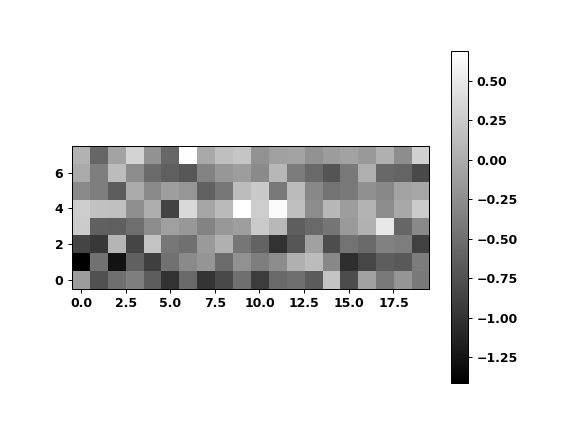

Combining images using median stacking.
Saving to file Tess_20images-mean_stack_median_cutout.fits
Done!
Combining images using mean stacking
Saving to file Tess_20images-mean_stack_mean_cutout.fits
Done!


<IPython.core.display.Javascript object>


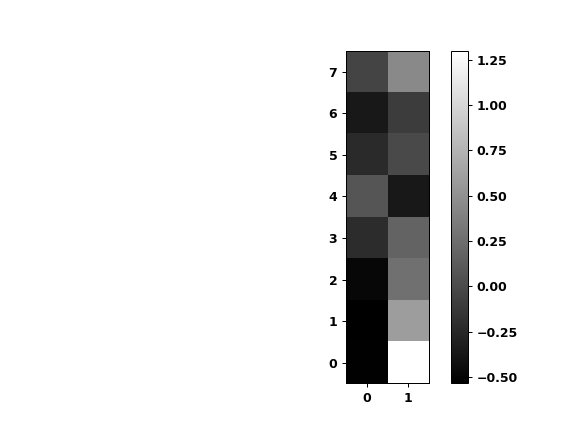

<IPython.core.display.Javascript object>


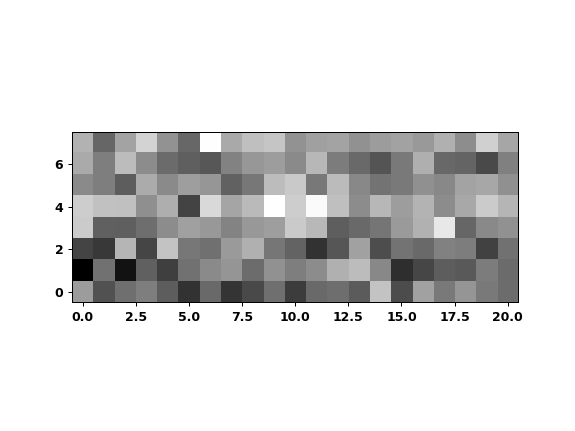

In [5]:
%matplotlib notebook
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
#plt.imshow(D.image_data.data[0], origin='lower', cmap='gray',norm=LogNorm())
#cbar = plt.colorbar()
new_data = D.image_data.data[:, 985:1015, 1060:1100]
new_data = D.image_data.data[:, 995:1003, 1079:1081]
D.image_data.data = new_data
for d in D.image_data.data:
    d -= np.mean(d)
plt.figure()
plt.imshow(np.array([d[:,0] for d in D.image_data.data]).T[:,:20], origin='lower', cmap='gray')
cbar = plt.colorbar()
D.stack(shifted=False, median_combine=True)
D.save_stack(f'Tess_{len(times)}images-mean_stack_median_cutout.fits')
D.stack(shifted=False, median_combine=False)
D.save_stack(f'Tess_{len(times)}images-mean_stack_mean_cutout.fits')
plt.figure()
plt.imshow(D.stacked_data.data, origin='lower', cmap='gray')
bar = plt.colorbar()
plt.figure()
a=[d[:,0] for d in D.image_data.data]
a.append(D.stacked_data.data[:,0])
plt.imshow(np.array(a).T, origin='lower', cmap='gray')

<IPython.core.display.Javascript object>


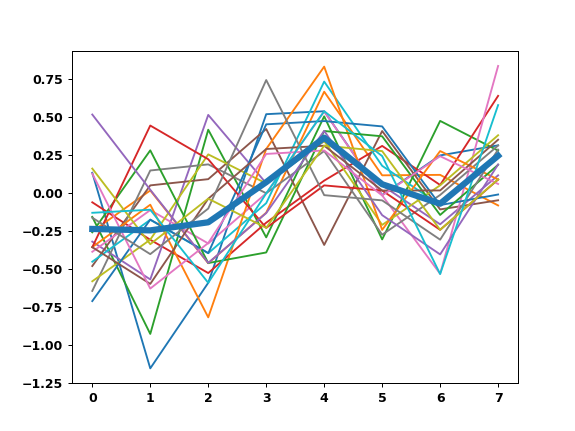

<IPython.core.display.Javascript object>


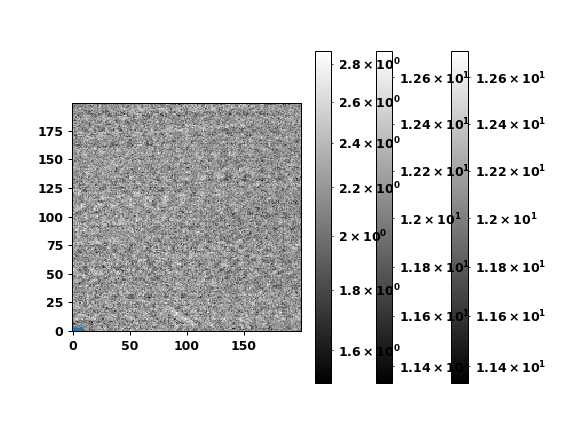

In [6]:
plt.figure()
for d in D.image_data.data:
    plt.plot(d[:,0]-np.mean(d[:,0]))
plt.plot(D.stacked_data.data[:,0]-np.mean(D.stacked_data.data[:,0]), lw=5)
plt.figure()
for d in D.image_data.data:
    plt.plot(d[:,-1]-np.mean(d[:,-1]))
plt.plot(D.stacked_data.data[:,-1]-np.mean(D.stacked_data.data[:,-1]), lw=5)

# Initial conditions and expected values:

# 2012 TF315

In [12]:
# Local imports
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import imagehandler
importlib.reload(imagehandler)
import glob
xxx=[]
ppp=[]
for iii in np.arange(0,25):
    filenames=sorted(glob.glob('/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[iii::25]
    '''
    Get times and shifts (as calculated by Horizons)
    '''
    importlib.reload(imagehandler)
    D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                               MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
    shifts = D._calculate_shifts_from_known(object_name='2012 TF315', obs_code='500@-95')
    times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
    print(len(times))
    D.integer_shift(shifts, padmean=True)
    D.stack(shifted=False, median_combine=True)
    D.save_stack(f'Tess_{len(times)}images_stack{iii}.fits')
    unshifted_stack = D.stacked_data.data
    
    for d in D.image_data.data:
        d -= unshifted_stack  
    '''
    Shift+stack using the known (from Horizons + WCS) shifts.
    '''
    shiftss=shifts.copy()
    shifts[:,1]=shiftss[:,1]
    shifts[:,0]=shiftss[:,0]
    D.integer_shift(shifts, padmean=True)
    D.stack(shifted=True, median_combine=True)
    D.save_stack(f'shift+stack_Tess_2012TF315_jpl{iii}.fits')
    xy0 = np.array([848, 1023]) - np.min(shifts,0).astype(int)
    print(xy0)
    xxx.append(xy0)
    xym = xy0 - 100
    xyp = xy0 + 100
    counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
    peak_count = np.max(counts_above_background[80:120,80:120])
    noise = np.std(counts_above_background)
    sigma = peak_count / noise
    print(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)')
    ppp.append([peak_count, noise, sigma])

for i, x in enumerate(xxx):
    print(x)
    print(ppp[i])

45
Combining images using median stacking.
Saving to file Tess_45images_stack0.fits
Done!
Combining images using median stacking.
Saving to file shift+stack_Tess_2012TF315_jpl0.fits
Done!
[ 848 1023]
Peak count $\pm$ noise =  1.3 $\pm$  0.5 ( 2.4$\sigma$)
45
Combining images using median stacking.
Saving to file Tess_45images_stack1.fits
Done!
Combining images using median stacking.
Saving to file shift+stack_Tess_2012TF315_jpl1.fits
Done!
[ 848 1023]
Peak count $\pm$ noise =  1.1 $\pm$  0.5 ( 2.1$\sigma$)
45
Combining images using median stacking.
Saving to file Tess_45images_stack2.fits
Done!
Combining images using median stacking.
Saving to file shift+stack_Tess_2012TF315_jpl2.fits
Done!
[ 848 1023]
Peak count $\pm$ noise =  1.2 $\pm$  0.5 ( 2.3$\sigma$)
45
Combining images using median stacking.
Saving to file Tess_45images_stack3.fits
Done!
Combining images using median stacking.
Saving to file shift+stack_Tess_2012TF315_jpl3.fits
Done!
[ 848 1023]
Peak count $\pm$ noise =  1.0 $\

KeyboardInterrupt: 

# 2009 DE69

In [7]:
'''
Get times and shifts (as calculated by Horizons)
'''
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=True)
shifts = D._calculate_shifts_from_known(object_name='2009 DE69', obs_code='500@-95')
times = np.array([dh['SHIFTY_MJD_MID'] for dh in D.image_data.header]) + 2400000.5
print(len(times))
print(shifts.astype(int))
D.integer_shift(shifts, padmean=True)
D.stack(shifted=False, median_combine=False)
D.save_stack(f'Tess_{len(times)}images_stack.fits')
unshifted_stack = D.stacked_data.data

EXPTIME EXPOSURE
dict_keys(['EXPTIME'])
MAGZERO 18.0
dict_keys(['EXPTIME', 'MAGZERO'])
MJD_START BJDREFI+TSTART+-2400000.5
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START'])
GAIN GAINA
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START', 'GAIN'])
FILTER -Tess
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START', 'GAIN', 'FILTER'])
NAXIS1 NAXIS1
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START', 'GAIN', 'FILTER', 'NAXIS1'])
NAXIS2 NAXIS2
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START', 'GAIN', 'FILTER', 'NAXIS1', 'NAXIS2'])
INSTRUMENT INSTRUME
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START', 'GAIN', 'FILTER', 'NAXIS1', 'NAXIS2', 'INSTRUMENT'])
{'EXPTIME': 1425.5994157631999, 'MAGZERO': 18.0, 'MJD_START': 58437.96446696203, 'GAIN': 5.349999904632568, 'FILTER': 'T', 'NAXIS1': 2136, 'NAXIS2': 2078, 'INSTRUMENT': 'TESS Photometer', 'MJD_MID': 58437.97271695865}
EXPTIME EXPOSURE
dict_keys(['EXPTIME'])
MAGZERO 18.0
dict_keys(['EXPTIME', 'MAGZERO'])
MJD_START BJDREFI+TSTART+-2400000.5
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_

0 2458438.4727169587
1 2458438.785221403
2 2458439.097725416
3 2458439.4102290273
4 2458439.7227322664
5 2458440.0352351605
6 2458440.347737732
7 2458440.660239998
8 2458440.972741972
9 2458441.3060771045
10 2458441.6185785127
11 2458441.93107966
12 2458442.243580553
13 2458442.556081198
14 2458442.868581599
15 2458443.1810817607
16 2458443.4935816866
17 2458443.80608138
18 2458444.1394141335
19 2458444.4519133545
20
[[   0    0]
 [  -1  -14]
 [  -3  -28]
 [  -4  -43]
 [  -5  -58]
 [  -6  -73]
 [  -7  -88]
 [  -8 -103]
 [  -8 -118]
 [  -9 -134]
 [  -9 -149]
 [ -10 -164]
 [ -10 -179]
 [ -10 -194]
 [ -10 -209]
 [ -10 -224]
 [ -10 -239]
 [ -10 -254]
 [ -10 -270]
 [ -10 -284]]
Shifting image 0 by [ 11 285]
Shifting image 1 by [  9 271]
Shifting image 2 by [  8 256]
Shifting image 3 by [  6 241]
Shifting image 4 by [  5 227]
Shifting image 5 by [  4 212]
Shifting image 6 by [  3 197]
Shifting image 7 by [  3 182]
Shifting image 8 by [  2 166]
Shifting image 9 by [  2 150]
Shifting image 10 

In [14]:
len(times)
times

array([2458438.47271696, 2458438.7852214 , 2458439.09772542,
       2458439.41022903, 2458439.72273227, 2458440.03523516,
       2458440.34773773, 2458440.66024   , 2458440.97274197,
       2458441.3060771 , 2458441.61857851, 2458441.93107966,
       2458442.24358055, 2458442.5560812 , 2458442.8685816 ,
       2458443.18108176, 2458443.49358169, 2458443.80608138,
       2458444.13941413, 2458444.45191335])

EXPTIME EXPOSURE
dict_keys(['EXPTIME'])
MAGZERO 18.0
dict_keys(['EXPTIME', 'MAGZERO'])
MJD_START BJDREFI+TSTART+-2400000.5
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START'])
GAIN GAINA
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START', 'GAIN'])
FILTER -Tess
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START', 'GAIN', 'FILTER'])
NAXIS1 NAXIS1
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START', 'GAIN', 'FILTER', 'NAXIS1'])
NAXIS2 NAXIS2
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START', 'GAIN', 'FILTER', 'NAXIS1', 'NAXIS2'])
INSTRUMENT INSTRUME
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_START', 'GAIN', 'FILTER', 'NAXIS1', 'NAXIS2', 'INSTRUMENT'])
{'EXPTIME': 1425.5994157631999, 'MAGZERO': 18.0, 'MJD_START': 58437.96446696203, 'GAIN': 5.349999904632568, 'FILTER': 'T', 'NAXIS1': 2136, 'NAXIS2': 2078, 'INSTRUMENT': 'TESS Photometer', 'MJD_MID': 58437.97271695865}
EXPTIME EXPOSURE
dict_keys(['EXPTIME'])
MAGZERO 18.0
dict_keys(['EXPTIME', 'MAGZERO'])
MJD_START BJDREFI+TSTART+-2400000.5
dict_keys(['EXPTIME', 'MAGZERO', 'MJD_

0 2458438.4727169587
1 2458438.785221403
2 2458439.097725416
3 2458439.4102290273
4 2458439.7227322664
5 2458440.0352351605
6 2458440.347737732
7 2458440.660239998
8 2458440.972741972
9 2458441.3060771045
10 2458441.6185785127
11 2458441.93107966
12 2458442.243580553
13 2458442.556081198
14 2458442.868581599
15 2458443.1810817607
16 2458443.4935816866
17 2458443.80608138
18 2458444.1394141335
19 2458444.4519133545
1
2
3
Shifting image 0 by [ 11 285]
Shifting image 1 by [  9 271]
Shifting image 2 by [  8 256]
Shifting image 3 by [  6 241]
Shifting image 4 by [  5 227]
Shifting image 5 by [  4 212]
Shifting image 6 by [  3 197]
Shifting image 7 by [  3 182]
Shifting image 8 by [  2 166]
Shifting image 9 by [  2 150]
Shifting image 10 by [  1 135]
Shifting image 11 by [  1 120]
Shifting image 12 by [  1 105]
Shifting image 13 by [ 0 90]
Shifting image 14 by [ 0 75]
Shifting image 15 by [ 0 60]
Shifting image 16 by [ 0 45]
Shifting image 17 by [ 0 31]
Shifting image 18 by [ 0 15]
Shifting 

<IPython.core.display.Javascript object>


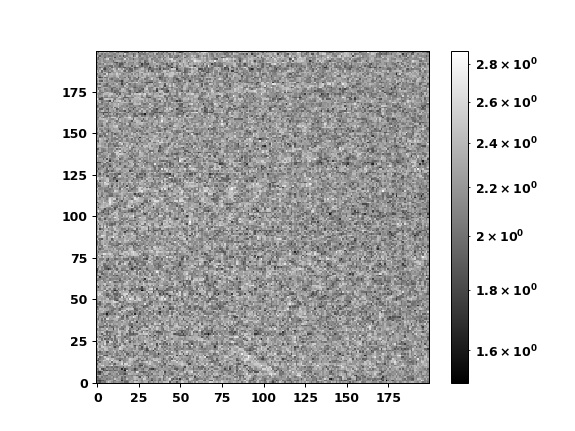

9


Peak count $\pm$ noise =  0.6 $\pm$  0.2 ( 3.7$\sigma$)

In [13]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=True)
shifts = D._calculate_shifts_from_known(object_name='2009 DE69', obs_code='500@-95')
for d in D.image_data.data:
    d -= unshifted_stack  
print(1)
'''
Shift+stack using the known (from Horizons + WCS) shifts.
'''
shiftss=shifts.copy()
print(2)
shifts[:,1]=shiftss[:,1]
shifts[:,0]=shiftss[:,0]
print(3)
D.integer_shift(shifts, padmean=True)
print(4)
D.stack(shifted=True, median_combine=True)
print(5)
D.save_stack(f'shift+stack_Tess_2009DE69_jpl.fits')
print(6)
#D.save_shifted('shift_Tess_2009DE69_jpl')
print(7)
xy0 = np.array([1342, 877]) - np.min(shifts,0).astype(int)
print(xy0)
xym = xy0 - 100
xyp = xy0 + 100
print(8)
plt.figure()
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
print(9)
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))

# Dorothea

In [11]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess')
shifts = D._calculate_shifts_from_known(object_name='Dorothea', obs_code='500@-95')
for d in D.image_data.data:
    d -= unshifted_stack
'''
Shift+stack using the known (from Horizons + WCS) shifts.
'''
shiftss=shifts.copy()
shifts[:,1]=shiftss[:,1]
shifts[:,0]=shiftss[:,0]
D.integer_shift(shifts, padmean=True)
D.stack(shifted=True, median_combine=True)
D.save_stack('shift+stack_Tess_Dorothea_jpl.fits')
D.save_shifted('shift_Tess_Dorothea_jpl')
xy0 = np.array([1342, 877]) - np.min(shifts,0).astype(int)
print(xy0)
xym = xy0 - 100
xyp = xy0 + 100
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))

Combining images using median stacking.
Saving to file shift+stack_Tess_Dorothea_jpl.fits
Done!
Saving to file shift_Tess_Dorothea_jpl_000.fits
Saving to file shift_Tess_Dorothea_jpl_001.fits
Saving to file shift_Tess_Dorothea_jpl_002.fits
Saving to file shift_Tess_Dorothea_jpl_003.fits
Saving to file shift_Tess_Dorothea_jpl_004.fits
Saving to file shift_Tess_Dorothea_jpl_005.fits
Saving to file shift_Tess_Dorothea_jpl_006.fits
Saving to file shift_Tess_Dorothea_jpl_007.fits
Saving to file shift_Tess_Dorothea_jpl_008.fits
Saving to file shift_Tess_Dorothea_jpl_009.fits
Saving to file shift_Tess_Dorothea_jpl_010.fits
Saving to file shift_Tess_Dorothea_jpl_011.fits
Saving to file shift_Tess_Dorothea_jpl_012.fits
Saving to file shift_Tess_Dorothea_jpl_013.fits
Saving to file shift_Tess_Dorothea_jpl_014.fits
Saving to file shift_Tess_Dorothea_jpl_015.fits
Saving to file shift_Tess_Dorothea_jpl_016.fits
Saving to file shift_Tess_Dorothea_jpl_017.fits
Saving to file shift_Tess_Dorothea_jpl_0

Peak count $\pm$ noise =  0.6 $\pm$  0.2 ( 3.5$\sigma$)

# Sedna

In [ ]:
importlib.reload(imagehandler)
D=imagehandler.DataHandler(filenames, extno=1, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                           MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess')
shifts = D._calculate_shifts_from_known(object_name='Sedna', obs_code='500@-95')
for d in D.image_data.data:
    d -= unshifted_stack
    d[unshifted_stack > np.median(unshifted_stack)+5] = 0
'''
Shift+stack using the known (from Horizons + WCS) shifts.
'''
shiftss=shifts.copy()
shifts[:,1]=shiftss[:,1]
shifts[:,0]=shiftss[:,0]
D.integer_shift(shifts, padmean=True)
D.stack(shifted=True, median_combine=False)
D.save_stack('shift+stack_Tess_Sedna_jpl.fits')
D.save_shifted('shift_Tess_Sedna_jpl')
xy0 = np.array([1543, 1103]) - np.min(shifts,0).astype(int)
print(xy0)
xym = xy0 - 100
xyp = xy0 + 100
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))

In [ ]:
xy0 = np.array([1103, 1543]) - np.min(shifts,0).astype(int)
print(xy0)
xym = xy0 - 100
xyp = xy0 + 100
plt.imshow((D.stacked_data.data-np.nanmin(D.stacked_data.data))[xym[0]:xyp[0],xym[1]:xyp[1]], origin='lower', cmap='gray',norm=LogNorm())
cbar = plt.colorbar()
counts_above_background = (D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]-np.nanmedian(D.stacked_data.data[xym[0]:xyp[0],xym[1]:xyp[1]]))
peak_count = np.max(counts_above_background[80:120,80:120])
noise = np.std(counts_above_background)
sigma = peak_count / noise
display(Markdown(fr'Peak count $\pm$ noise = {peak_count:4.1f} $\pm$ {noise:4.1f} ({sigma:4.1f}$\sigma$)'))

In [ ]:
shifts.astype(int)

In [ ]:
'''
Get the EXPECTED thetas from the JPL Horizons ephemerides.
'''
from astroquery.jplhorizons import Horizons
# Query for reference time:
horizons_query0 = Horizons(id='sedna', location='568', epochs=time0, id_type='smallbody')
horizons_ephem0 = horizons_query0.ephemerides(extra_precision=False)
# Query for whole array of times:
horizons_query = Horizons(id='sedna', location='568', epochs=times, id_type='smallbody')
horizons_ephem = horizons_query.ephemerides(extra_precision=False)

latlon_expected = np.array(eq_to_ec(np.radians(horizons_ephem['RA']), np.radians(horizons_ephem['DEC']))).T
expected_thetas = np.array(ec_to_proj(*latlon_expected.T, *latlon0)).T
expected_thetas_asec = np.degrees(expected_thetas) * 3600
print(expected_thetas_asec)

In [ ]:
horizons_ephem['RA'][0],horizons_ephem['DEC'][0]

### Now with thetas/shifts calculated from ABG